<h1 align = "center"> Basic Break Even Analysis </h1>
<h4 align = "right"> Uttara Bammireddy </h4>

<h3 align = "center"> Base Model </h3>

In [3]:
# Import Libraries

import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from whatif import Model


In [4]:
class SingleProductSPF(Model):

    def __init__(self, fixed_cost = 5000, var_cost = 100, selling_price = 115,
                 spf_constant = 4900, spf_linear = -35, spf_quadratic = 0.06):
 
        super().__init__() # Required when using whatif functions

        # Core inputs
        self.fixed_cost = fixed_cost
        self.var_cost = var_cost
        self.selling_price = selling_price

        # Coefficients for the quadratic Selling Price Function (SPF)
        self.spf_constant = spf_constant
        self.spf_linear = spf_linear
        self.spf_quadratic = spf_quadratic

    def demand(self):
        """
        Compute demand using the Selling Price Function (SPF)
        D = 0.06*S^2 - 35*S + 4900 
        """
        S = self.selling_price
        return self.spf_quadratic * (S ** 2) + self.spf_linear * S + self.spf_constant

    def total_cost(self):
        """
        Total cost = Fixed cost + Variable cost × Demand
        """
        return self.fixed_cost + self.var_cost * self.demand()

    def revenue(self):
        """
        Revenue = Selling price × Demand
        """
        return self.selling_price * self.demand()

    def profit(self):
        """
        Profit = Revenue - Total Cost
        """
        return self.revenue() - self.total_cost()

    def summary(self):
        """
        Output Results
        """
        print(f"Selling Price: ${self.selling_price}")
        print(f"Demand:        {self.demand():.0f}")
        print(f"Total Cost:    ${self.total_cost():,.2f}")
        print(f"Revenue:       ${self.revenue():,.2f}")
        print(f"Profit:        ${self.profit():,.2f}")    

In [5]:
model = SingleProductSPF(selling_price = 115)
model.summary()

Selling Price: $115
Demand:        1668
Total Cost:    $171,850.00
Revenue:       $191,877.50
Profit:        $20,027.50


<h3 align = "center"> One-Way Data Table and Plot </h3>

In [7]:
# Create model instance

model = SingleProductSPF()

# Create one-way data table using the method

price_range = list(range(80, 141, 10)) # Input Range: Selling price from 80 to 140, step 10
one_way_table = model.data_table(
    scenario_inputs = {'selling_price': price_range},
    outputs = ['demand', 'profit']
)

# Display the table

pd.set_option("display.float_format", "{:.2f}".format)
one_way_table

,selling_price,demand,profit
0,80,2484.00,-54680.00
1,90,2236.00,-27360.00
2,100,2000.00,-5000.00
3,110,1776.00,12760.00
4,120,1564.00,26280.00
5,130,1364.00,35920.00
6,140,1176.00,42040.00


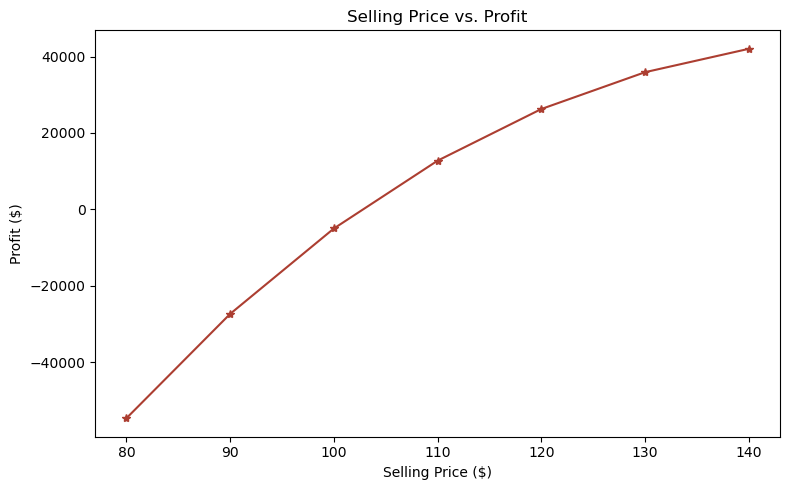

In [8]:
# Plot

plt.figure(figsize = (8, 5))
plt.plot(one_way_table['selling_price'], one_way_table['profit'], marker = '*' , color = '#AC3E31')
plt.title("Selling Price vs. Profit")
plt.xlabel("Selling Price ($)")
plt.ylabel("Profit ($)")
plt.xticks(price_range)
plt.tight_layout()
plt.show()

**The relationship between selling price and profit is *nonlinear*. This is because the demand function is a quadratic equation(demand decreases at a changing rate as price increases). While profit rises with selling price, it does so at a decreasing rate due to the trade-off between higher price and lower demand. The resulting curve reflects diminishing returns at higher prices.**

<h3 align = "center"> Break Even </h3>

In [11]:
# Model Instance

model = SingleProductSPF()

break_even_price = model.goal_seek(
    obj_fn = 'profit',        # function we want to set to 0
    target = 0,               # target value
    by_changing = 'selling_price',  # variable to adjust
    a = 80,                   # lower bound of search range
    b = 140                   # upper bound of search range
)

print(f"Break-even selling price: ${break_even_price:.2f}")

Break-even selling price: $102.58


<h3 align = "center"> Two-Way Data Table and Plot </h3>

In [13]:
# Model Instance

model = SingleProductSPF()

price_range = list(range(80, 141, 10))       # Input Range: Selling price from 80 to 140, step 10
var_cost_range = list(range(85, 111, 5))     # Input Range: Production Cost from 85 to 110, step 5

two_way_table = model.data_table(
    scenario_inputs = {'selling_price': price_range,
                       'var_cost': var_cost_range
                      },
    outputs = ['profit', 'total_cost']
)

# Preview
two_way_table.head()

,selling_price,var_cost,profit,total_cost
0,80,85,-17420.00,216140.00
1,80,90,-29840.00,228560.00
2,80,95,-42260.00,240980.00
3,80,100,-54680.00,253400.00
4,80,105,-67100.00,265820.00


In [14]:
# Pivot table: Rows = var_cost, Columns = selling_price, Values = profit
profit_pivot = two_way_table.pivot(index = 'var_cost', columns = 'selling_price', values = 'profit')

# Rounding off values
profit_pivot = profit_pivot.round(0)

profit_pivot

selling_price,80,90,100,110,120,130,140
var_cost,,,,,,,
85,-17420.00,6180.00,25000.00,39400.00,49740.00,56380.00,59680.00
90,-29840.00,-5000.00,15000.00,30520.00,41920.00,49560.00,53800.00
95,-42260.00,-16180.00,5000.00,21640.00,34100.00,42740.00,47920.00
100,-54680.00,-27360.00,-5000.00,12760.00,26280.00,35920.00,42040.00
105,-67100.00,-38540.00,-15000.00,3880.00,18460.00,29100.00,36160.00
110,-79520.00,-49720.00,-25000.00,-5000.00,10640.00,22280.00,30280.00


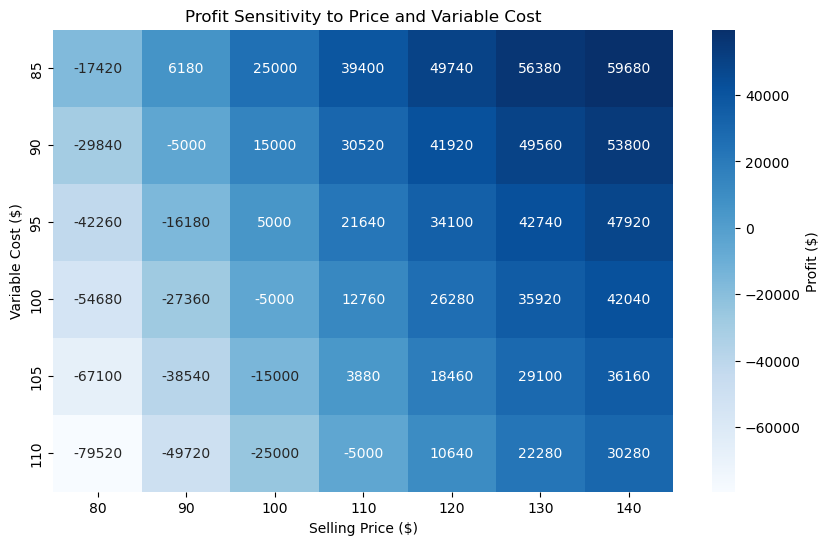

In [15]:
# Plot

plt.figure(figsize = (10, 6))
sns.heatmap(profit_pivot, annot = True, fmt = ".0f", cmap = "Blues", cbar_kws = {'label': 'Profit ($)'})
plt.title("Profit Sensitivity to Price and Variable Cost")
plt.xlabel("Selling Price ($)")
plt.ylabel("Variable Cost ($)")
plt.show()

<h3 align = "center"> Redo Goal Seek </h3>

In [17]:
# Model Instance

model = SingleProductSPF()

break_even_redo = model.goal_seek(
    obj_fn = 'profit',        # function we want to set to 0
    target = 0,               # target value
    by_changing = 'selling_price',  # variable to adjust
    a = 80,                   # lower bound of search range
    b = 250                   # upper bound of search range
)

print(f"Break-even price: {break_even_redo}")

Break-even price: None


**The goal seek method couldn't find a break-even price in the range from 80 to 250 because there was no point where profit equals zero in that entire range. At lower prices (like 80), the business loses money (negative profit). Around 103, the profit becomes zero (break-even), and after that, the profit keeps going up. So in the range from 80 to 250, profit is either negative or positive - but it only crosses zero once. Since goal seek needs profit to start negative at one end and positive at the other, it fails when both ends are already positive.**


<h3 align = "center"> Redo One-Way Table </h3>

In [20]:
# Create model instance

model = SingleProductSPF()

# Create one-way data table using the method

price_range_extended = list(range(80, 251, 10)) # Input Range: Selling price from 80 to 250, step 10
one_way_table_extended = model.data_table(
    scenario_inputs = {'selling_price': price_range_extended},
    outputs = ['demand', 'profit']
)

# Display the table

pd.set_option("display.float_format", "{:.2f}".format)
one_way_table_extended

,selling_price,demand,profit
0,80,2484.00,-54680.00
1,90,2236.00,-27360.00
2,100,2000.00,-5000.00
3,110,1776.00,12760.00
4,120,1564.00,26280.00
5,130,1364.00,35920.00
6,140,1176.00,42040.00
7,150,1000.00,45000.00
8,160,836.00,45160.00
9,170,684.00,42880.00


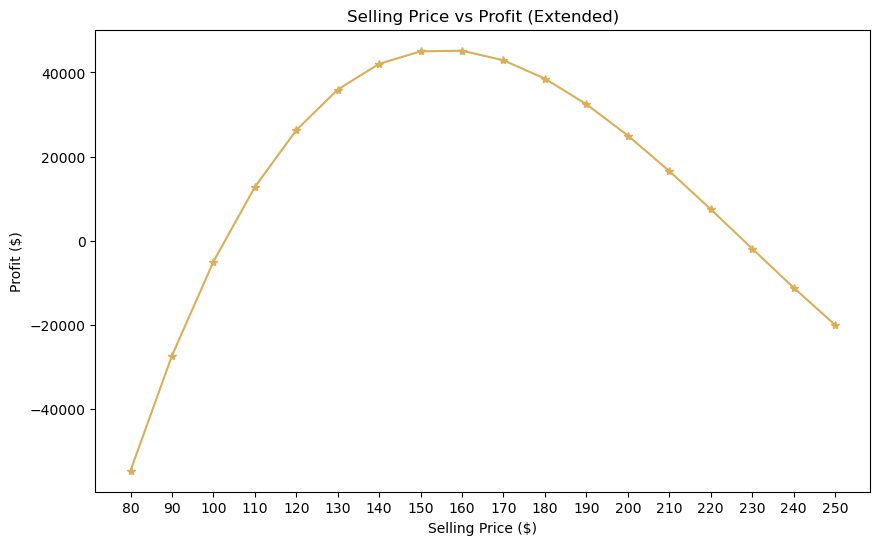

In [21]:
# Plot

plt.figure(figsize=(10, 6))
plt.plot(one_way_table_extended['selling_price'], one_way_table_extended['profit'], marker = '*' , color = '#DBAE58')
plt.title("Selling Price vs Profit (Extended)")
plt.xlabel("Selling Price ($)")
plt.ylabel("Profit ($)")
plt.xticks(price_range_extended)
plt.show()

**The goal seek method failed in the 80 - 250 range because the profit doesn't steadily increase. Instead, it rises and then falls, crossing zero twice. Since goal seek can only find one break-even point and requires the function to consistently move from negative to positive (or vice versa), it gets confused when profit turns back negative from positive at the higher prices. That’s why it couldn't find a valid break-even in the extended range.**


<h3 align = "center"> Simulation </h3>

In [24]:
from whatif import get_sim_results_df

# Model instance
model = SingleProductSPF(selling_price = 115)

# Generate 1000 random values for variable cost between 80 and 120 (uniform distribution)
n = 1000
random_vcost = np.random.uniform(80, 120, size = n)

# Run simulation 1000 times
results = []

for cost in random_vcost:
    random_input = {'var_cost': cost}
    sim_result = model.simulate(
        random_inputs = random_input,
        outputs = ['profit'],
        keep_random_inputs = True
    )
    results.append(sim_result[0])  # simulate returns a list

sim_result  

[{'scenario_base_vals': {'fixed_cost': 5000,
   'var_cost': 87.57923864056295,
   'selling_price': 115,
   'spf_constant': 4900,
   'spf_linear': -35,
   'spf_quadratic': 0.06},
  'scenario_num': 0,
  'scenario_vals': {},
  'output': {'profit': 40751.540328220726}}]

In [25]:
# Convert to DataFrame

df_sim = pd.DataFrame({'var_cost': [r['scenario_base_vals']['var_cost'] for r in results],
                       'profit': [r['output']['profit'] for r in results]
                      })

df_sim

,var_cost,profit
0,117.23,-8723.87
1,107.55,7434.51
2,95.80,27039.46
3,80.25,52977.86
4,87.26,41284.49
...,...,...
995,87.74,40487.77
996,86.52,42514.48
997,104.65,12272.94
998,91.24,34646.62


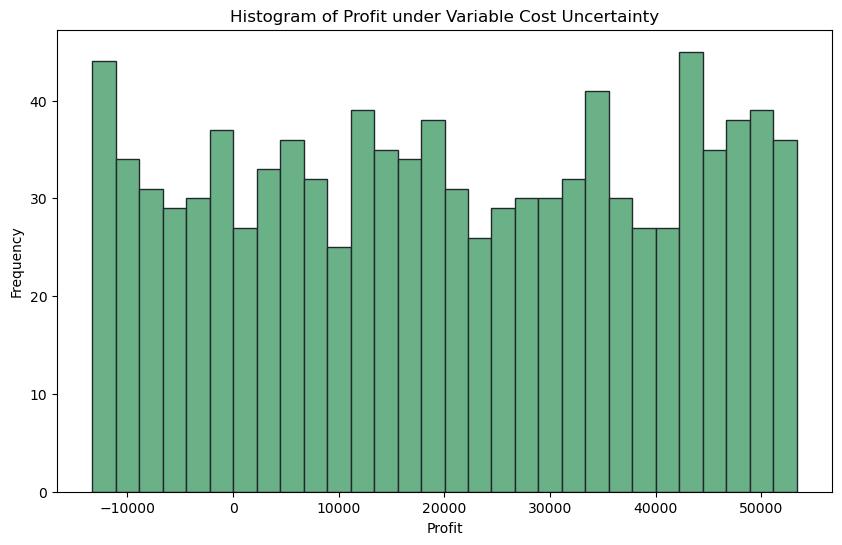

In [26]:
# Plot histogram of profit

plt.figure(figsize = (10, 6))
plt.hist(df_sim['profit'], bins = 30, color = '#6AB187' , edgecolor = '#23282D')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Histogram of Profit under Variable Cost Uncertainty')
plt.show()


In [27]:
# Probability of negative profit

prob_negative = (df_sim['profit'] < 0).mean()
print(f"Probability of negative profit: {prob_negative:.2%}")

Probability of negative profit: 20.50%
